# Machine learning examples from Mastering Machine Learning with scikit-learn book

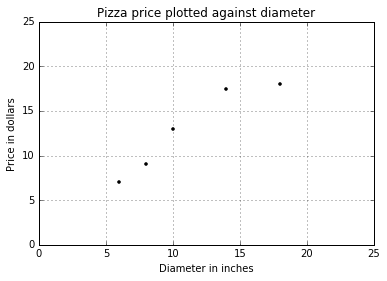

In [6]:
# Chapter 2: Linear regression

# Pizza price example
import matplotlib.pyplot as plt
%matplotlib inline

# Data
X = [[6], [8], [10], [14], [18]] # diameter in inches
y = [[7], [9], [13], [17.5], [18]] # price in dollars

# Plot the data
plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.plot(X, y, "k.")
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [7]:
# Train and fit the model using linear regression
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict price for a 12 inches pizza
print("A 12 inches pizza should cost: ${:.2f}".format(model.predict([12])[0][0]))

A 12 inches pizza should cost: $13.68


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [8]:
# Compute the residual sum of squares for our model
import numpy as np
residual = np.mean((model.predict(X) - y) ** 2)
print("Residual sum of squares is: {:.2f}".format(residual))

Residual sum of squares is: 1.75


In [9]:
# Computer R-squared value
X_test = [[8], [9], [11], [16], [12]]
Y_test = [[11], [8.5], [15], [18], [11]]
Rsquared = model.score(X_test, Y_test)
print("R-squared value is: {:.4f}".format(Rsquared))

R-squared value is: 0.6620


In [10]:
# Multiple linear regression using more data
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model_multiple = LinearRegression()
model_multiple.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model_multiple.predict(X_test)
for i, prediction in enumerate(predictions):
    print("Predicted: {}, Target: {}".format(prediction, y_test[i]))
print("R-squared value is: {:.4f}".format(model_multiple.score(X_test, y_test)))

Predicted: [ 10.06250019], Target: [11]
Predicted: [ 10.28125019], Target: [8.5]
Predicted: [ 13.09375019], Target: [15]
Predicted: [ 18.14583353], Target: [18]
Predicted: [ 13.31250019], Target: [11]
R-squared value is: 0.7702


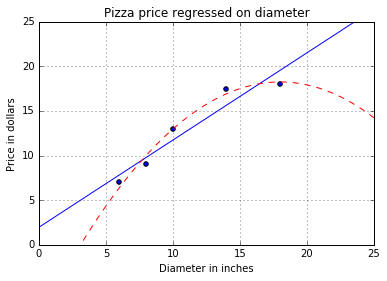

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
Simple linear regression r-squared: 0.809726832466861
Quadratic regression r-squared: 0.867544365634511


In [23]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared: {}'.format(regressor.score(X_test, y_test)))
print('Quadratic regression r-squared: {}'.format(regressor_quadratic.score(X_test_quadratic, y_test)))

In [40]:
# More complete example using wine data from UCI Machine Learning Repository's Wine data
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


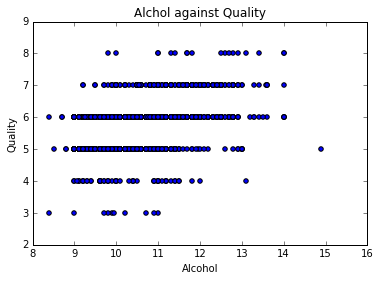

In [42]:
# Create some scatter plots
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alchol against Quality')
plt.show()

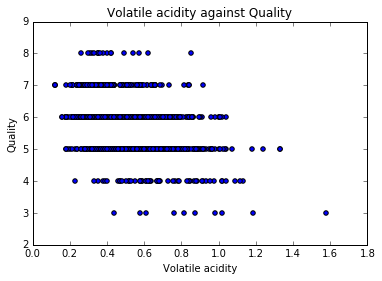

In [43]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile acidity')
plt.ylabel('Quality')
plt.title('Volatile acidity against Quality')
plt.show()

In [54]:
#Find correlations
df.corr()

# sort correlations
# df.corr().unstack().order(kind='quicksort')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [69]:
# Fitting a model using alchol/quality correlation and volatile acidity/quality negative correlation
from sklearn.cross_validation import train_test_split

X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared: {}'.format(regressor.score(X_test, y_test)))

R-squared: 0.3371596792458732


In [70]:
# Use cross-validation to improve the model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean(), scores)

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]
